In [1]:
# 導入必要的庫
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

# transform timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [3]:
# Display basic information
print("Dataset Basic Information:")
print(df.info())

# Display the first few rows of data
print("\nFirst 5 Rows of the Dataset:")
display(df.head())

# Display basic statistical information
print("Basic Statistical Information:")
display(df.describe())

# Check for missing values
print("\nMissing Values Statistics:")
display(df.isnull().sum())

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   timestamp               datetime64[ns]
 1   open                    float64       
 2   high                    float64       
 3   low                     float64       
 4   close                   float64       
 5   volume                  float64       
 6   quote_asset_volume      float64       
 7   number_of_trades        float64       
 8   taker_buy_base_volume   float64       
 9   taker_buy_quote_volume  float64       
 10  target                  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 178.1 MB
None

First 5 Rows of the Dataset:


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,2018-05-04 22:01:00,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,2018-05-04 22:02:00,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,2018-05-04 22:03:00,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,2018-05-04 22:04:00,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,2018-05-04 22:05:00,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


Basic Statistical Information:


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2122438,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,2020-05-10 20:59:29.999994880,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
min,2018-05-04 22:01:00,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019-05-08 09:30:15,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,2020-05-10 20:59:30,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,2021-05-14 08:28:45,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,2022-05-17 19:58:00,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00
std,NaN,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01



Missing Values Statistics:


timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
target                    0
dtype: int64

Target Variable Distribution:


target
0.0    0.524215
1.0    0.475785
Name: proportion, dtype: float64

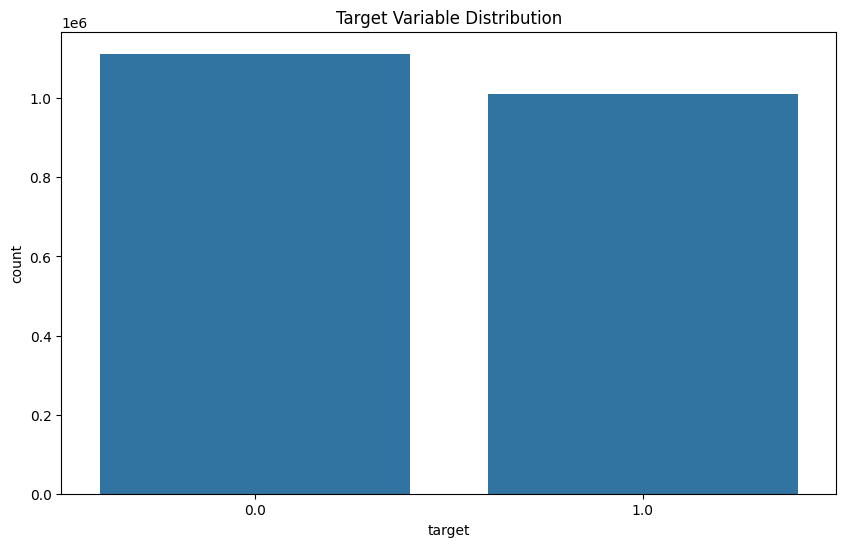

In [4]:
# View the distribution of the target variable
target_dist = df['target'].value_counts(normalize=True)
print("Target Variable Distribution:")
display(target_dist)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target')
plt.title("Target Variable Distribution")
plt.show()

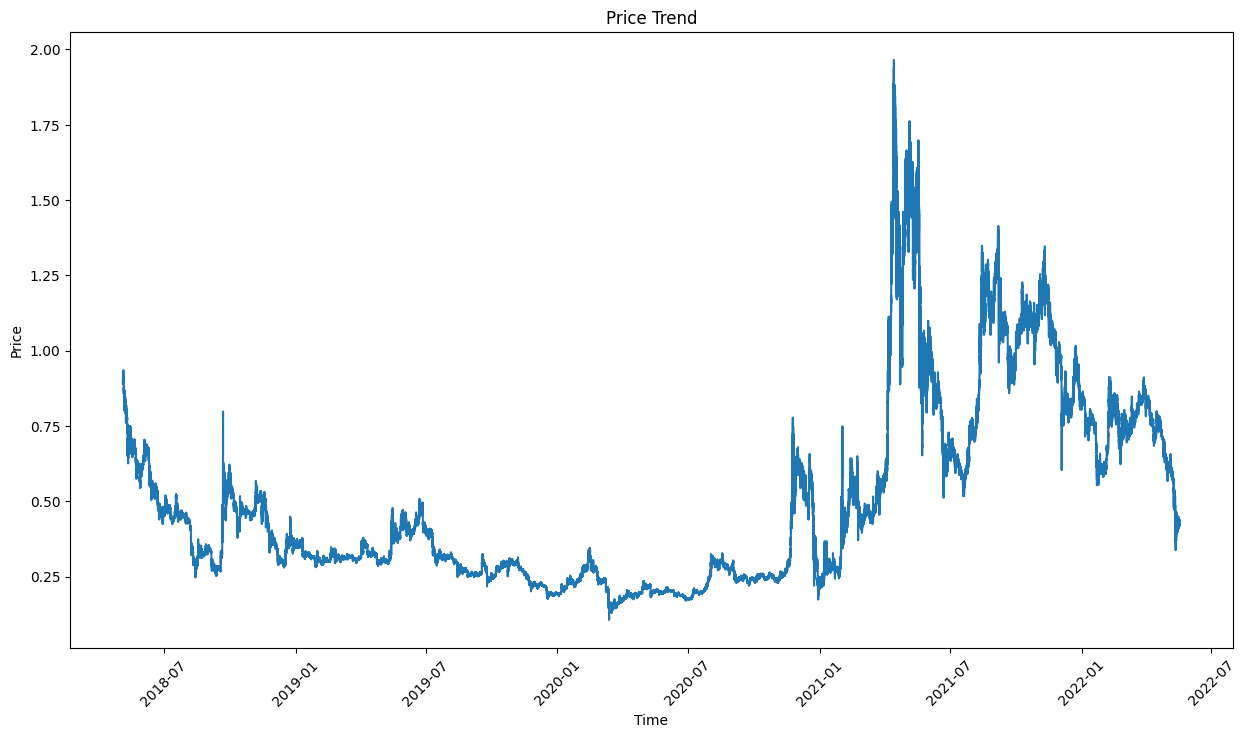

In [5]:
# Price trend
plt.figure(figsize=(15, 8))
plt.plot(df['timestamp'], df['close'])
plt.title('Price Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

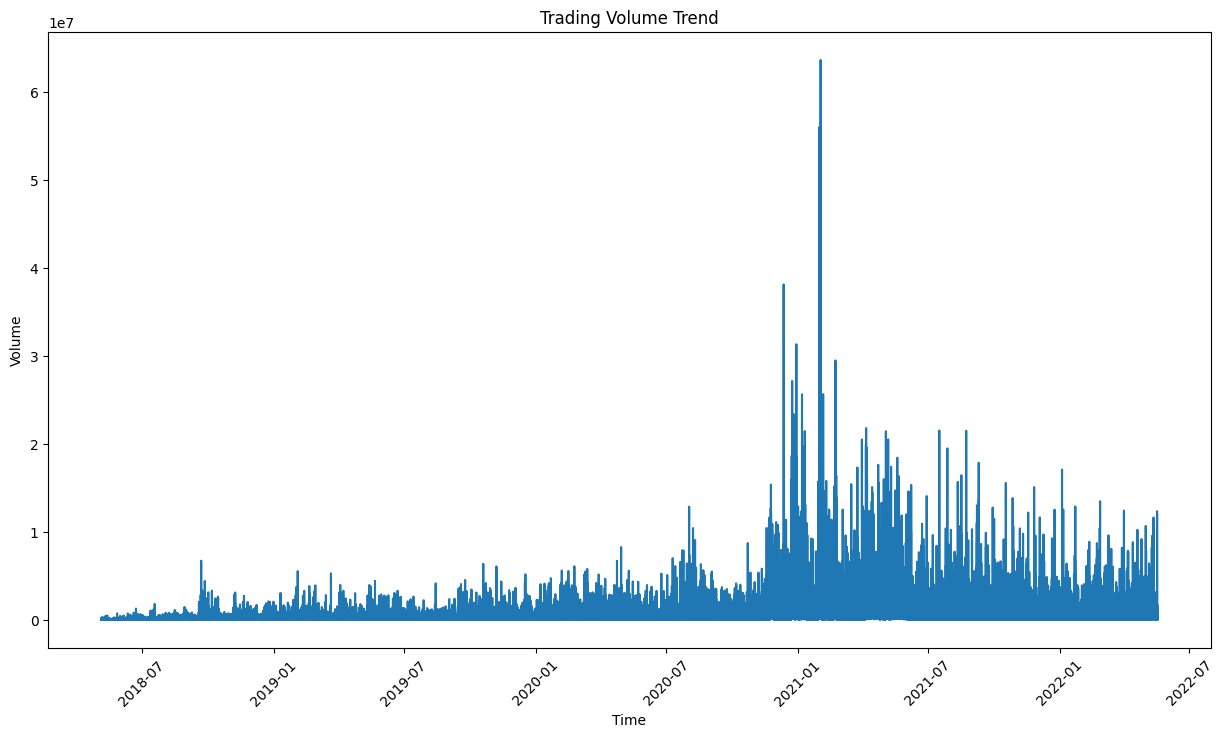

In [6]:
# Trading Volume Trend
plt.figure(figsize=(15, 8))
plt.plot(df['timestamp'], df['volume'])
plt.title("Trading Volume Trend")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()

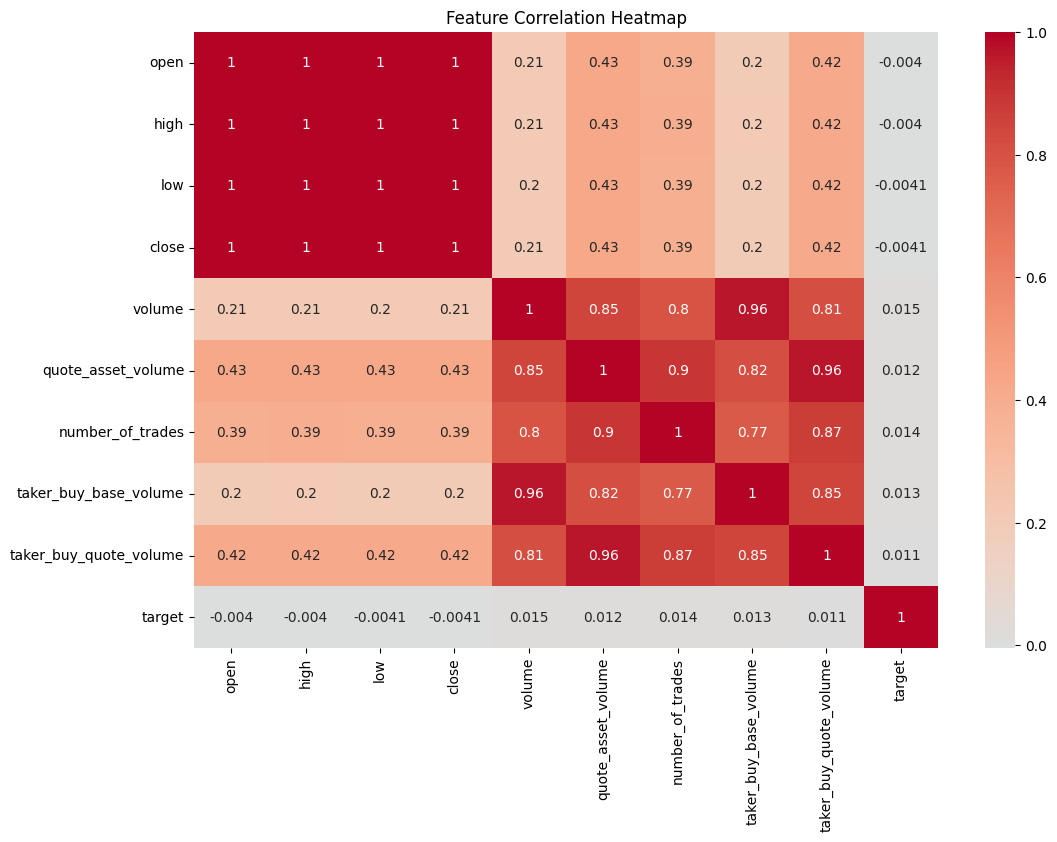

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
# 定義切分點，例如前80%作為訓練集
split_ratio = 0.8
split_point = int(len(df) * split_ratio)

# 切分數據
train_df = df.iloc[:split_point].reset_index(drop=True)
val_df = df.iloc[split_point:].reset_index(drop=True)

In [9]:
# Feature Engineering
def engineer_features(df):
    df = df.copy()
    
    # Price-related Features
    df['price_change'] = df['close'] - df['open']
    df['price_change_pct'] = df['price_change'] / df['open']
    df['price_range'] = df['high'] - df['low']
    df['price_range_pct'] = df['price_range'] / df['open']
    
    # Technical Indicators - RSI (Relative Strength Index)
    for window in [3, 5, 10]:
        delta = df['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        df[f'rsi_{window}'] = 100 - (100 / (1 + rs))
    
    # Technical Indicators - MACD (Moving Average Convergence Divergence)
    exp1 = df['close'].ewm(span=12, adjust=False).mean()
    exp2 = df['close'].ewm(span=26, adjust=False).mean()
    df['macd_line'] = exp1 - exp2
    df['macd_signal'] = df['macd_line'].ewm(span=9, adjust=False).mean()
    df['macd_hist'] = df['macd_line'] - df['macd_signal']
    
    # Volatility Indicators
    df['hl_range'] = df['high'] - df['low']
    df['hc_range'] = abs(df['high'] - df['close'].shift(1))
    df['lc_range'] = abs(df['low'] - df['close'].shift(1))
    df['true_range'] = pd.concat([df['hl_range'], df['hc_range'], df['lc_range']], axis=1).max(axis=1)
    
    # Volume Features
    df['volume_delta'] = df['volume'].diff()
    for window in [5, 10, 20]:
        df[f'volume_ma_{window}'] = df['volume'].rolling(window=window).mean()
        df[f'volume_std_{window}'] = df['volume'].rolling(window=window).std()
    
    # Market Microstructure Features
    df['buy_pressure'] = df['taker_buy_base_volume'] / df['volume']
    df['avg_trade_size'] = df['volume'] / df['number_of_trades']
    df['price_impact'] = abs(df['close'] - df['open']) / df['volume']
    
    return df


In [11]:
# Feature Engineering
def engineer_features(df):
    df = df.copy()
    
    # Price-related Features
    df['price_change'] = df['close'] - df['open']
    df['price_change_pct'] = df['price_change'] / df['open']
    df['price_range'] = df['high'] - df['low']
    df['price_range_pct'] = df['price_range'] / df['open']
    
    # Technical Indicators - RSI (Relative Strength Index)
    for window in [3, 5, 10]:
        delta = df['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        df[f'rsi_{window}'] = 100 - (100 / (1 + rs))
    
    # Technical Indicators - MACD (Moving Average Convergence Divergence)
    exp1 = df['close'].ewm(span=12, adjust=False).mean()
    exp2 = df['close'].ewm(span=26, adjust=False).mean()
    df['macd_line'] = exp1 - exp2
    df['macd_signal'] = df['macd_line'].ewm(span=9, adjust=False).mean()
    df['macd_hist'] = df['macd_line'] - df['macd_signal']
    
    # Volatility Indicators
    df['hl_range'] = df['high'] - df['low']
    df['hc_range'] = abs(df['high'] - df['close'].shift(1))
    df['lc_range'] = abs(df['low'] - df['close'].shift(1))
    df['true_range'] = pd.concat([df['hl_range'], df['hc_range'], df['lc_range']], axis=1).max(axis=1)
    
    # Volume Features
    df['volume_delta'] = df['volume'].diff()
    for window in [5, 10, 20]:
        df[f'volume_ma_{window}'] = df['volume'].rolling(window=window).mean()
        df[f'volume_std_{window}'] = df['volume'].rolling(window=window).std()
    
    # Market Microstructure Features
    df['buy_pressure'] = df['taker_buy_base_volume'] / df['volume']
    df['avg_trade_size'] = df['volume'] / df['number_of_trades']
    df['price_impact'] = abs(df['close'] - df['open']) / df['volume']
    
    return df

# Execute Feature Engineering
train_df_featured = engineer_features(train_df)
val_df_featured = engineer_features(val_df)
print("Data after Feature Engineering:")
display(train_df_featured.head())

Data after Feature Engineering:


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,...,volume_delta,volume_ma_5,volume_std_5,volume_ma_10,volume_std_10,volume_ma_20,volume_std_20,buy_pressure,avg_trade_size,price_impact
0,2018-05-04 22:01:00,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926656,33.745000,7.408505e-07
1,2018-05-04 22:02:00,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,...,935.56,NaN,NaN,NaN,NaN,NaN,NaN,0.821959,89.211667,9.341080e-08
2,2018-05-04 22:03:00,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,...,1222.52,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,458.612000,4.360985e-09
3,2018-05-04 22:04:00,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,...,4557.53,NaN,NaN,NaN,NaN,NaN,NaN,0.260751,360.557368,0.000000e+00
4,2018-05-04 22:05:00,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,...,-6018.29,2236.294,2694.468965,NaN,NaN,NaN,NaN,0.942953,277.433333,1.081341e-07


In [13]:
# Remove missing values
train_df_featured = train_df_featured.fillna(method='ffill').fillna(method='bfill')
val_df_featured = val_df_featured.fillna(method='ffill').fillna(method='bfill')

# 準備特徵和目標變量
feature_cols = [col for col in train_df_featured.columns if col not in ['timestamp', 'target']]

X_train = train_df_featured[feature_cols]
y_train = train_df_featured['target']

X_val = val_df_featured[feature_cols]
y_val = val_df_featured['target']

/var/folders/zc/fpd0g53d2vgdp8kf_k0xv7h40000gn/T/ipykernel_62743/3572950629.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df_featured = train_df_featured.fillna(method='ffill').fillna(method='bfill')
/var/folders/zc/fpd0g53d2vgdp8kf_k0xv7h40000gn/T/ipykernel_62743/3572950629.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  val_df_featured = val_df_featured.fillna(method='ffill').fillna(method='bfill')


In [14]:
# 8. 模型訓練
# 設置LightGBM參數
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'n_estimators': 500,
    'importance_type': 'gain'
}

In [15]:
# Update TimeSeriesSplit to use on training data
tscv = TimeSeriesSplit(n_splits=5)

cv_scores = []
feature_importance_list = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
    print(f"\nTraining Fold {fold + 1}")
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = lgb.LGBMClassifier(**params)
    model.fit(X_t, y_t)
    
    y_pred = model.predict(X_v)
    cv_score = f1_score(y_v, y_pred, average='macro')
    cv_scores.append(cv_score)
    
    print(f"Fold {fold + 1} Macro F1 Score: {cv_score:.4f}")
    
    # Save feature importance
    fold_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importances_
    })
    feature_importance_list.append(fold_importance)

# 9. 模型評估
print("\n交叉驗證結果：")
print(f"平均 Macro F1 分數: {np.mean(cv_scores):.4f}")
print(f"標準差: {np.std(cv_scores):.4f}")


Training Fold 1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current val

In [16]:
# Combine training and validation data
full_X = pd.concat([X_train, X_val], axis=0)
full_y = pd.concat([y_train, y_val], axis=0)

# Retrain the model on the full dataset
final_model_full = lgb.LGBMClassifier(**params)
final_model_full.fit(full_X, full_y)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fract

LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, feature_fraction=0.8,
               importance_type='gain', lambda_l1=0.1, lambda_l2=0.2,
               learning_rate=0.05, metric='binary_logloss', n_estimators=500,
               objective='binary')

In [19]:
# Read test data
test_df = pd.read_csv('test.csv')

# Transform timestamp to datetime
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], unit='s')

# Apply feature engineering
test_df_featured = engineer_features(test_df)

# Handle missing values (use the same method as training data)
test_df_featured = test_df_featured.fillna(method='ffill').fillna(method='bfill')

# Ensure feature alignment
X_test = test_df_featured[feature_cols]

# Make predictions
test_predictions = final_model_full.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    'row_id': test_df['row_id'],  # Replace 'id' with the appropriate identifier
    'target': test_predictions.astype(int)
})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")

/var/folders/zc/fpd0g53d2vgdp8kf_k0xv7h40000gn/T/ipykernel_62743/3696360136.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df_featured = test_df_featured.fillna(method='ffill').fillna(method='bfill')


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
Submission file created successfully.
